In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank.csv',sep=';')

In [25]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# check for null values

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# EDA

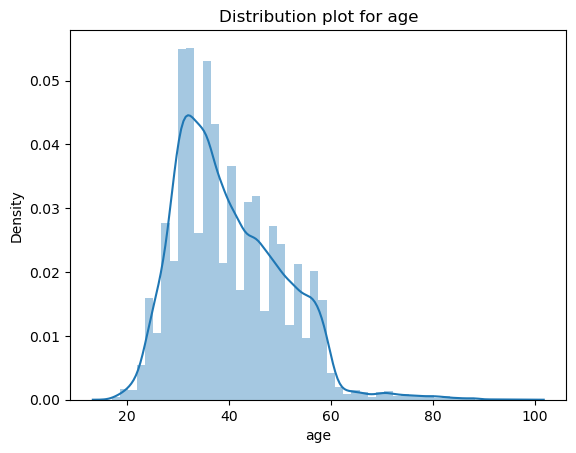

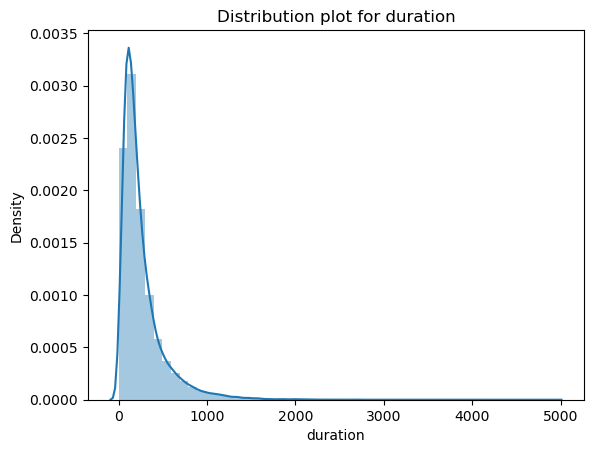

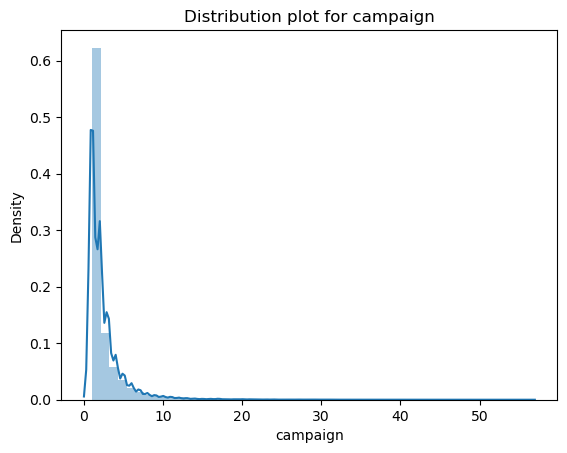

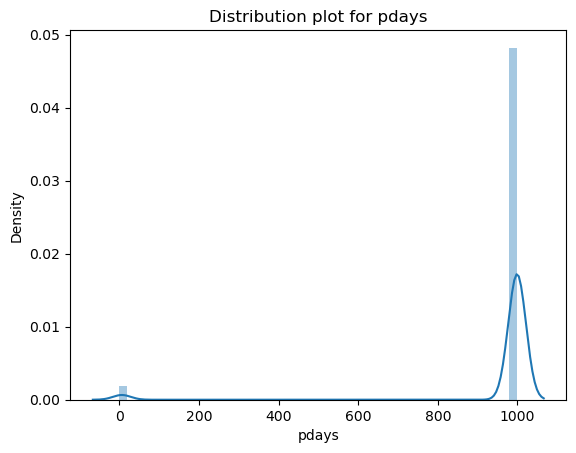

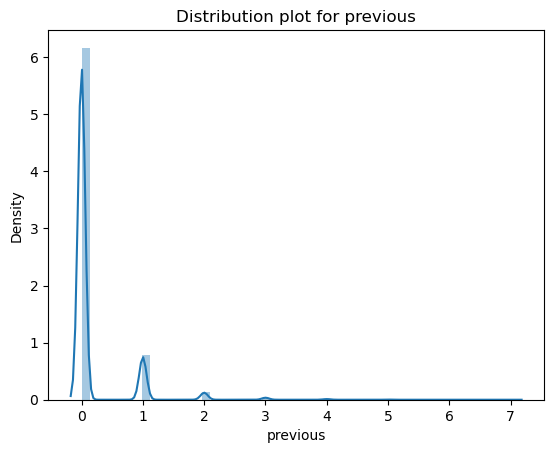

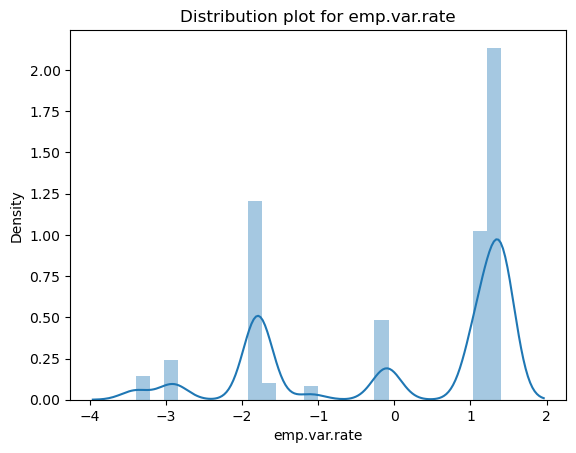

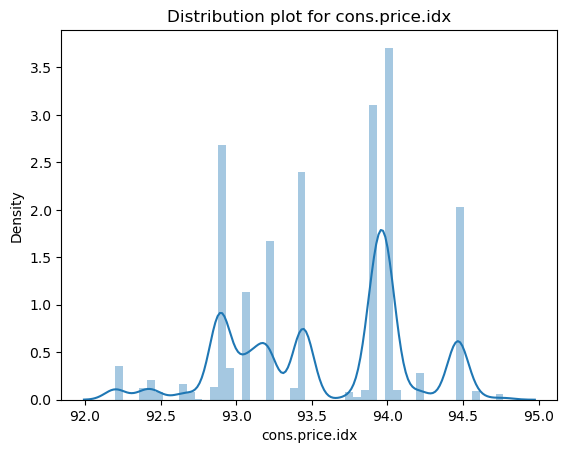

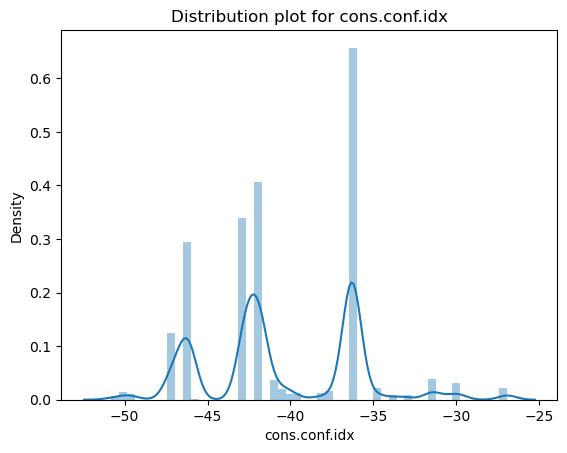

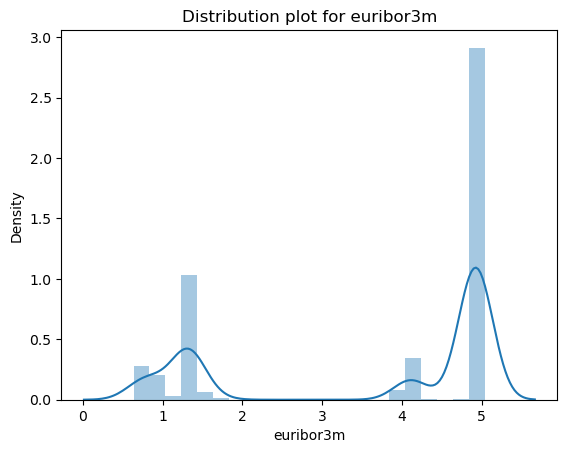

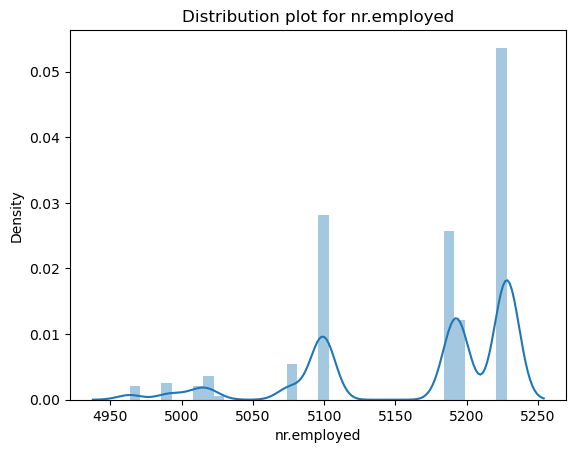

In [7]:
num_features = data.select_dtypes(include=[np.number])

for i in num_features.columns:
    sns.distplot(num_features[i])
    plt.title(f"Distribution plot for {i}")
    plt.show()

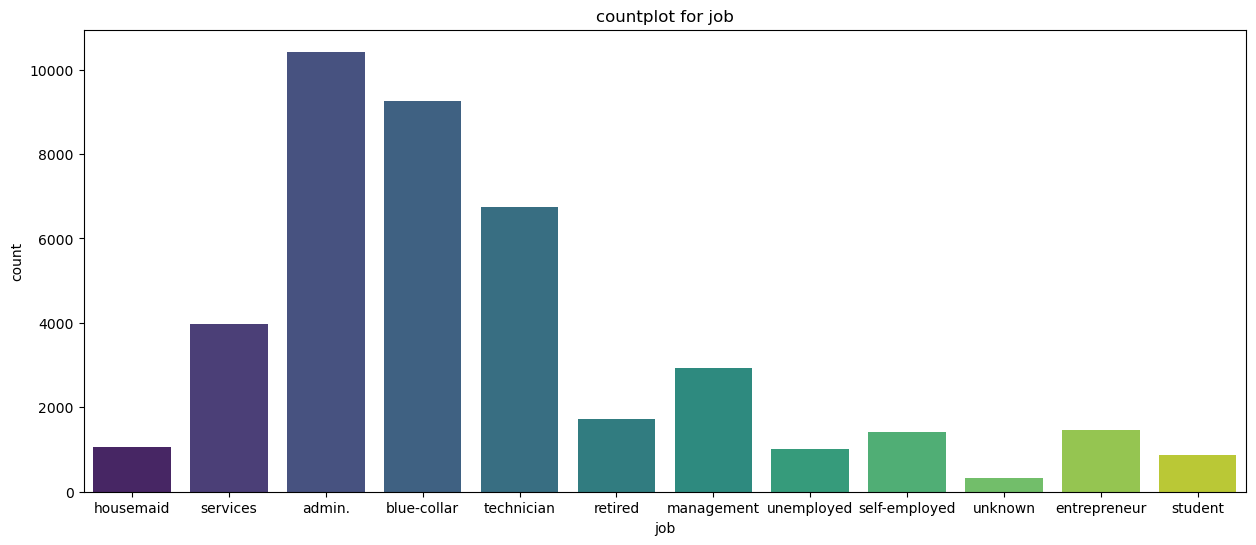

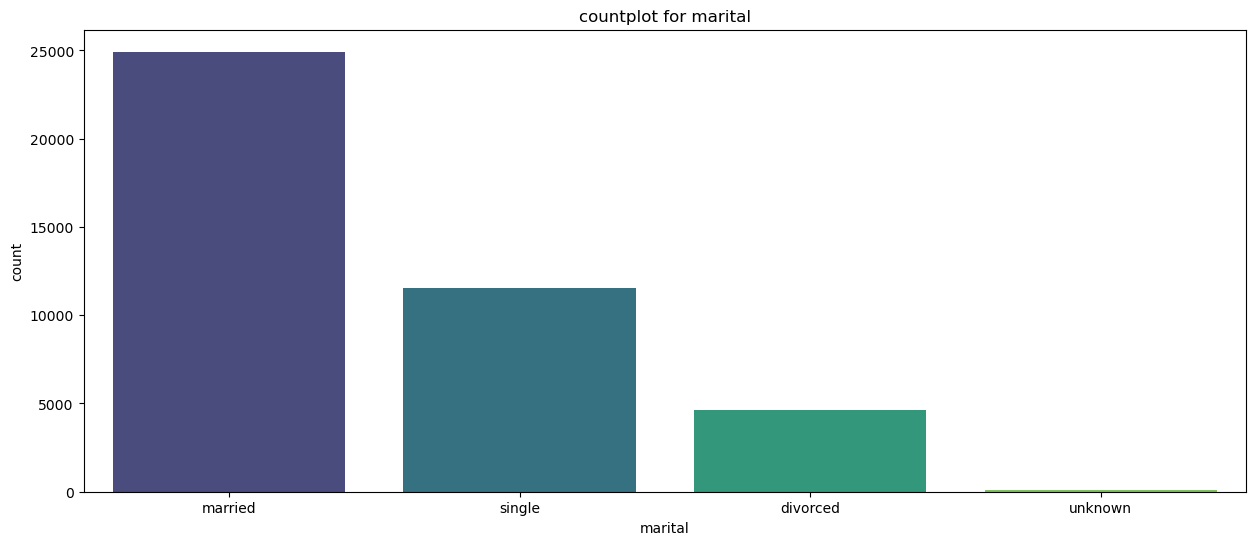

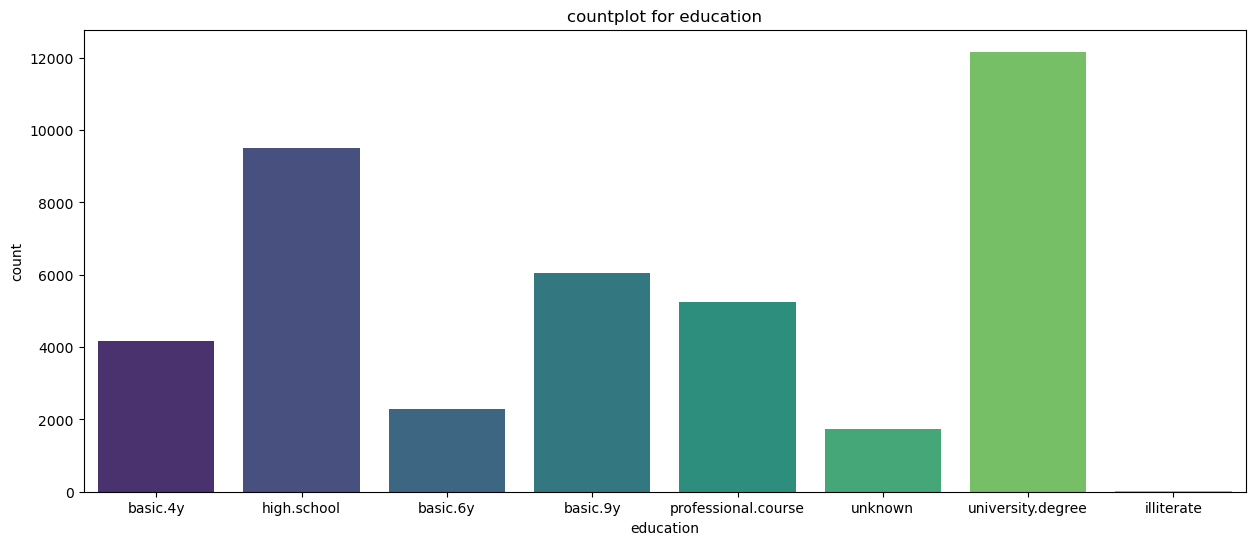

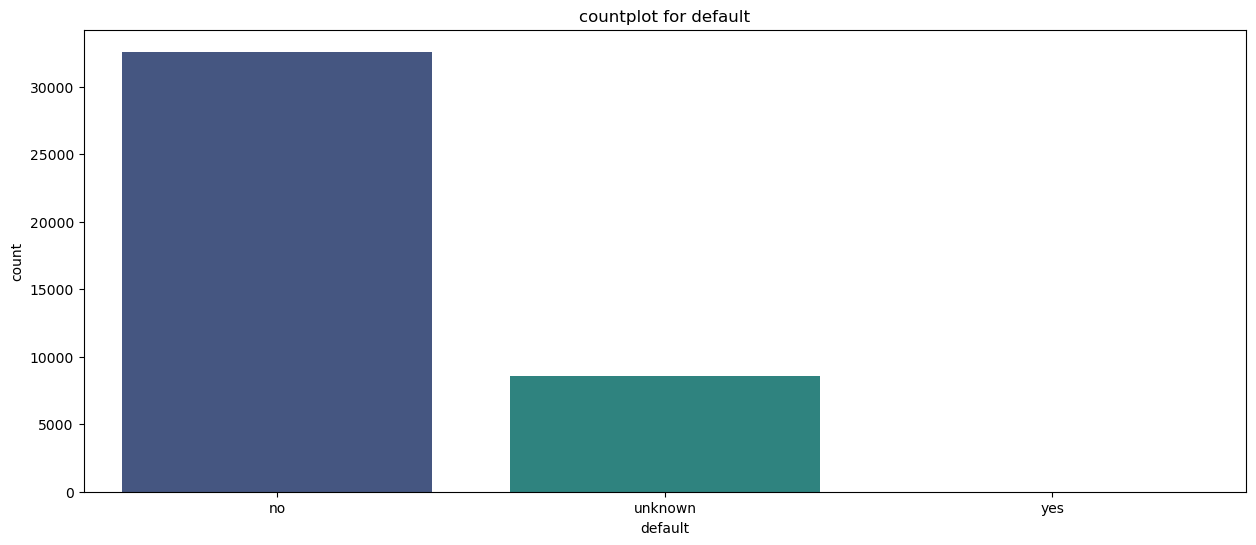

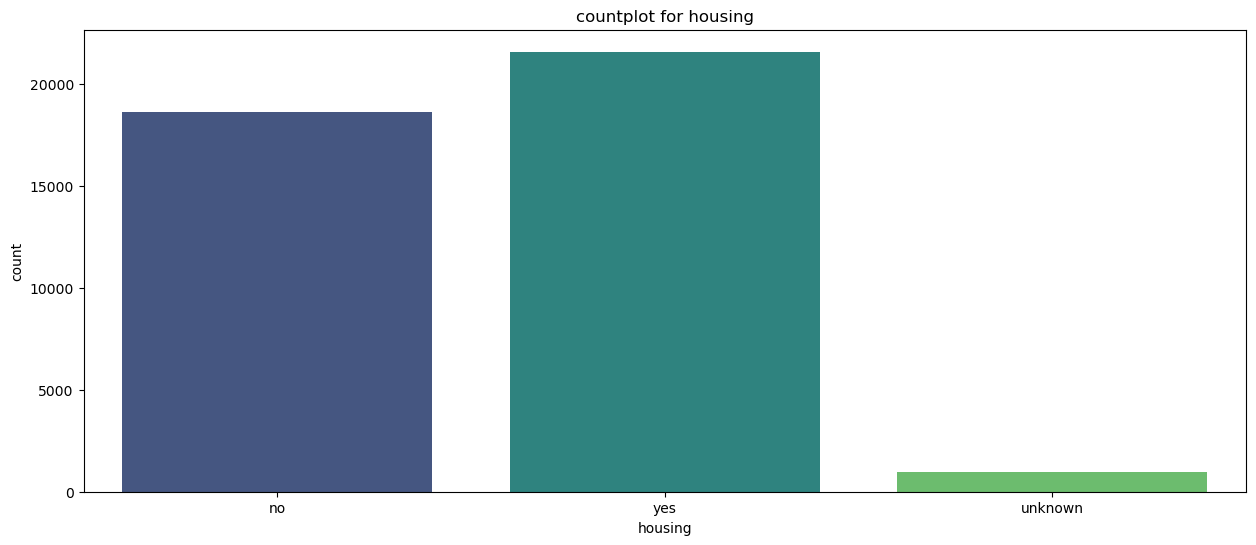

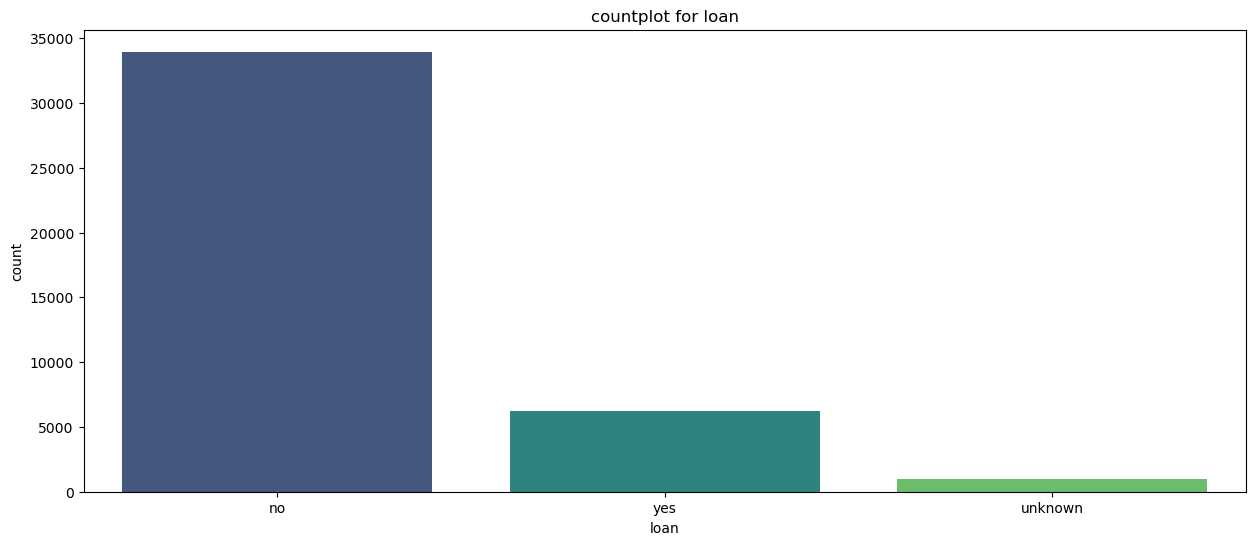

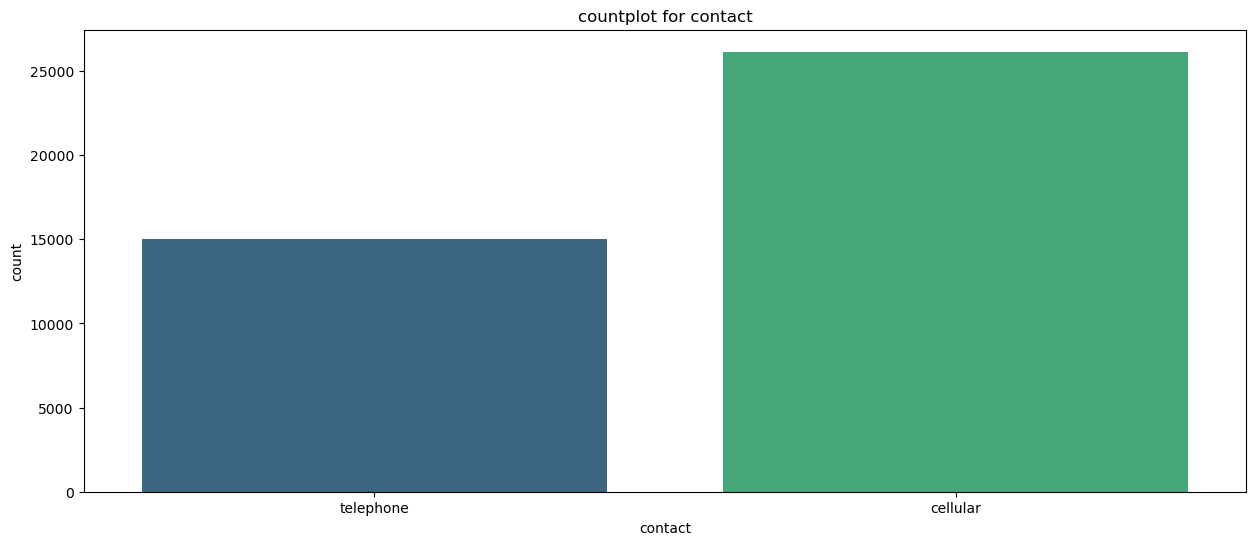

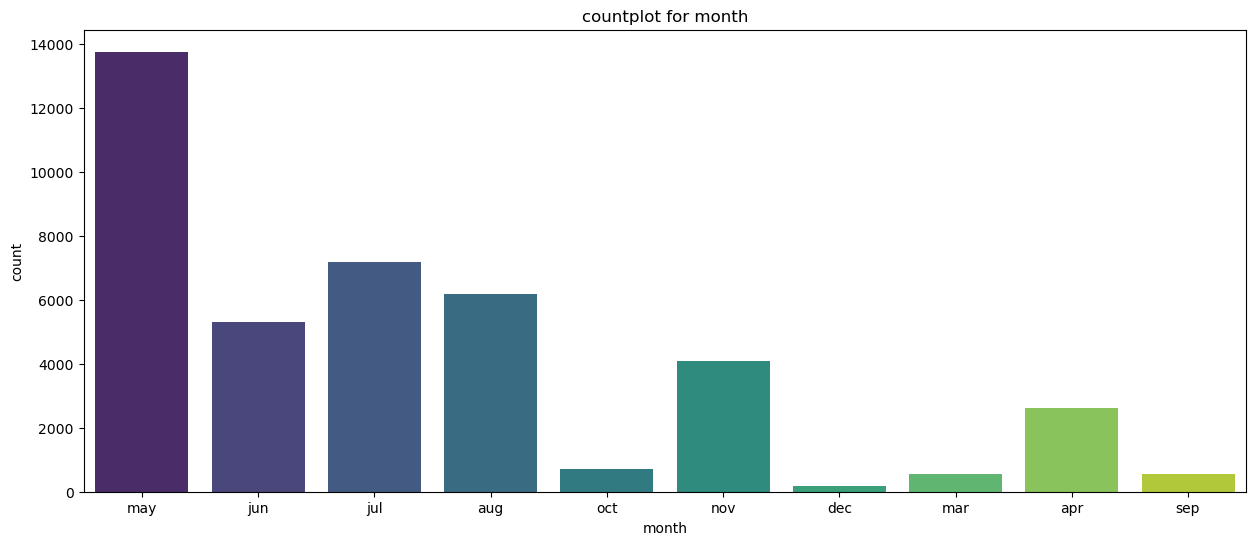

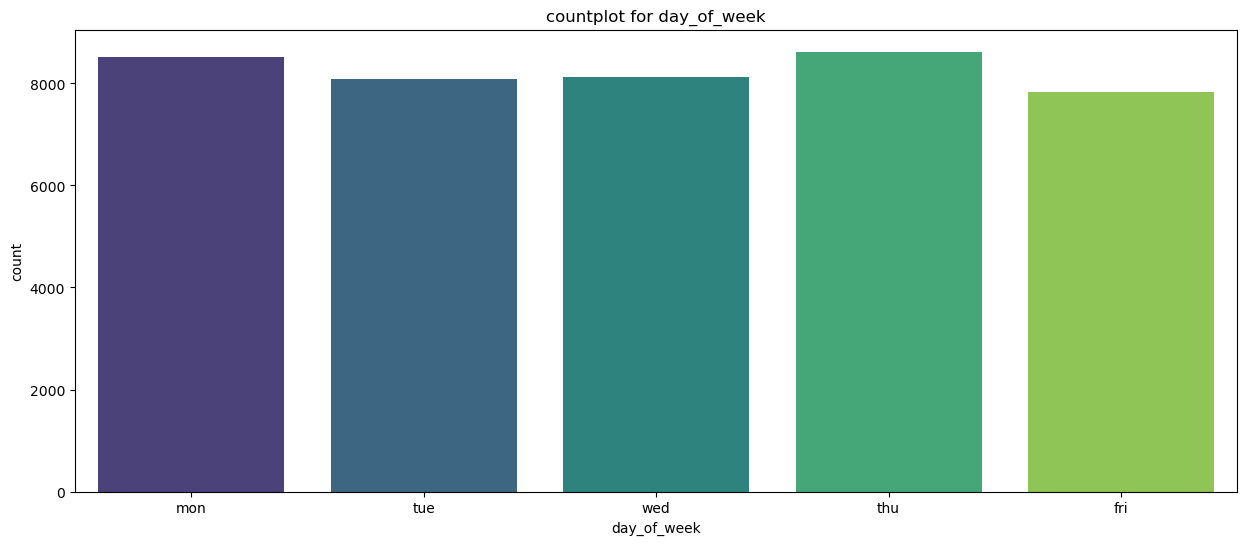

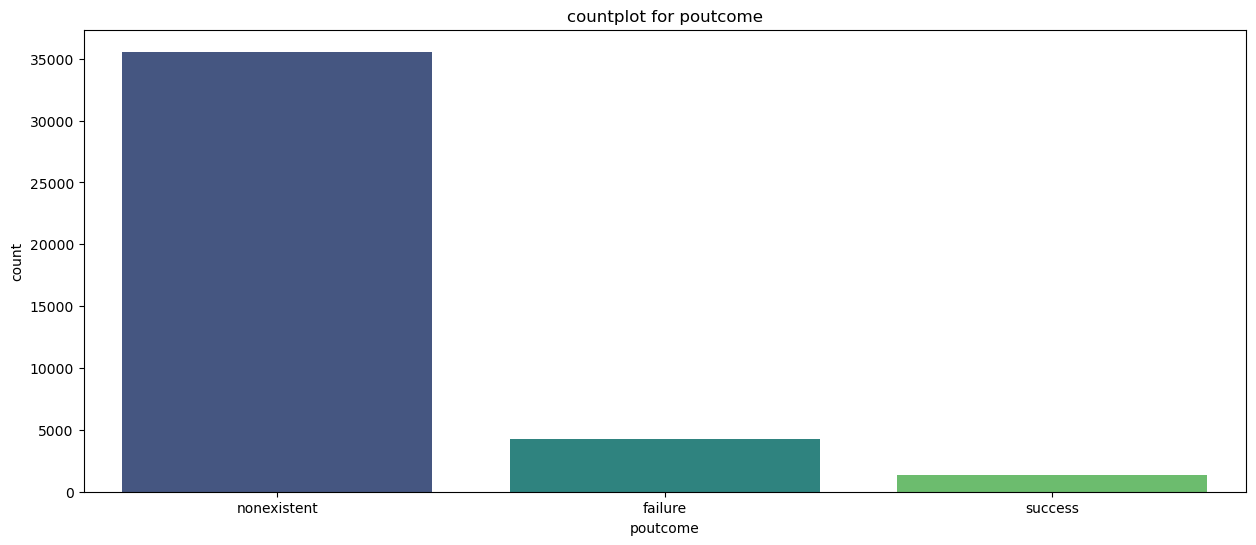

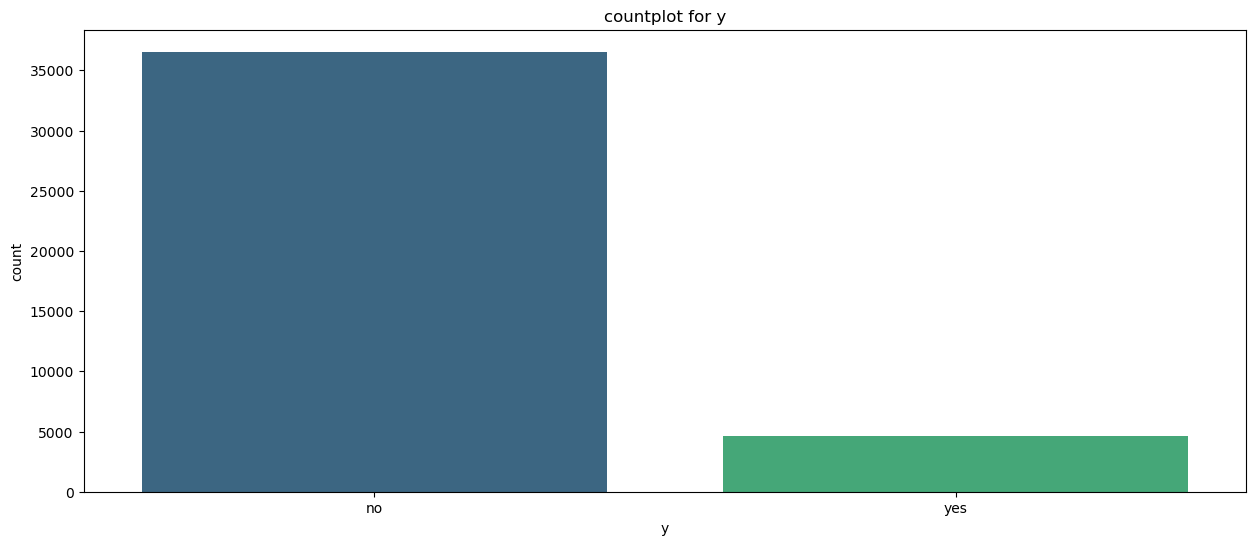

In [8]:
categ_features = data.select_dtypes(include='object')

for i in categ_features.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(categ_features[i],palette='viridis')
    plt.title(f"countplot for {i}")
    plt.show()

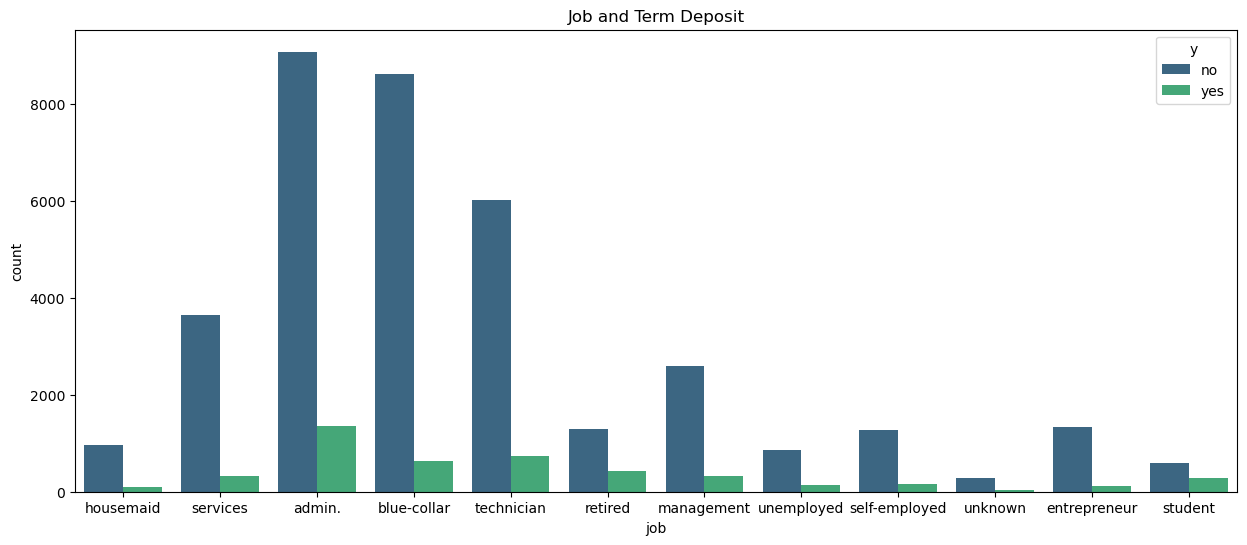

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'job', hue = 'y', palette='viridis',data=data)
plt.title("Job and Term Deposit")
plt.show()

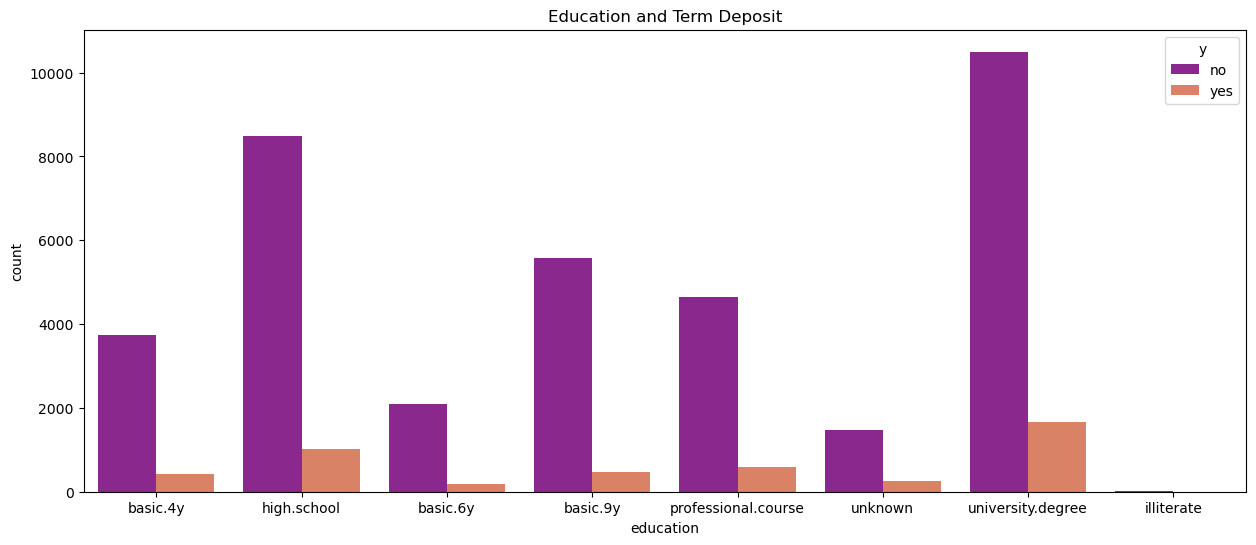

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'education', hue = 'y', palette='plasma',data=data)
plt.title("Education and Term Deposit")
plt.show()

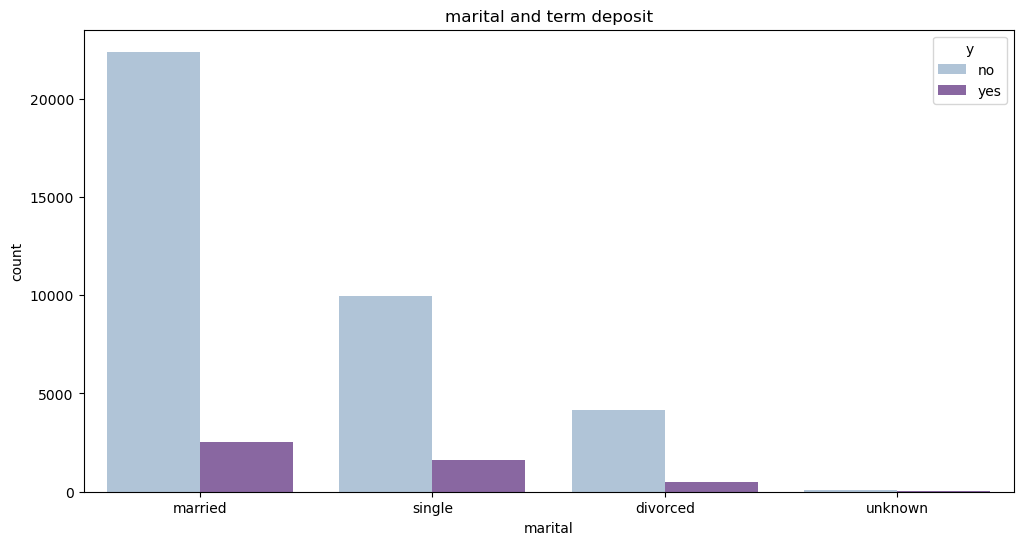

In [11]:
plt.figure(figsize=(12,6))

sns.countplot(x='marital',hue='y',data=data,palette='BuPu')
plt.title("marital and term deposit")
plt.show()

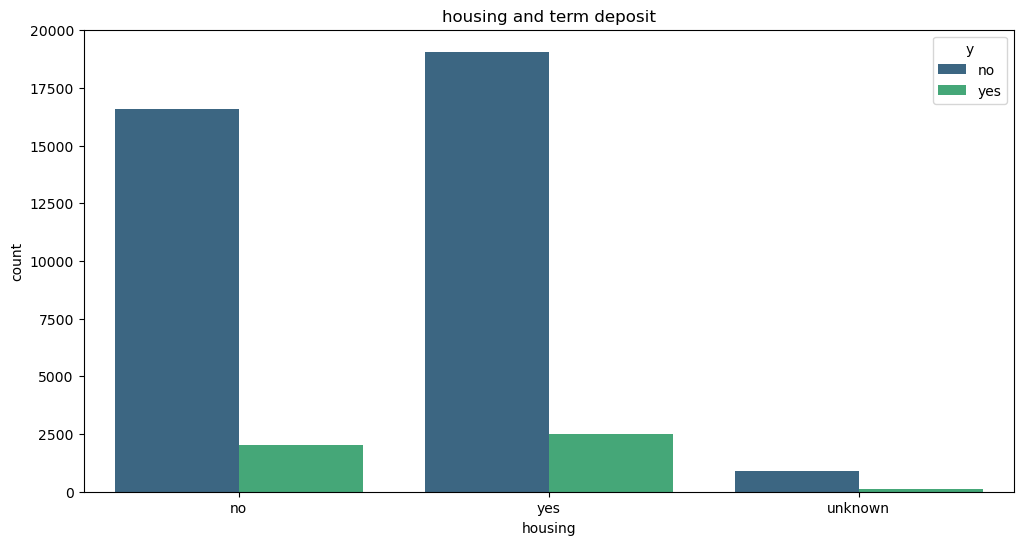

In [12]:
plt.figure(figsize=(12,6))

sns.countplot(x='housing',hue='y',data=data,palette='viridis')
plt.title("housing and term deposit")
plt.show()

<AxesSubplot:>

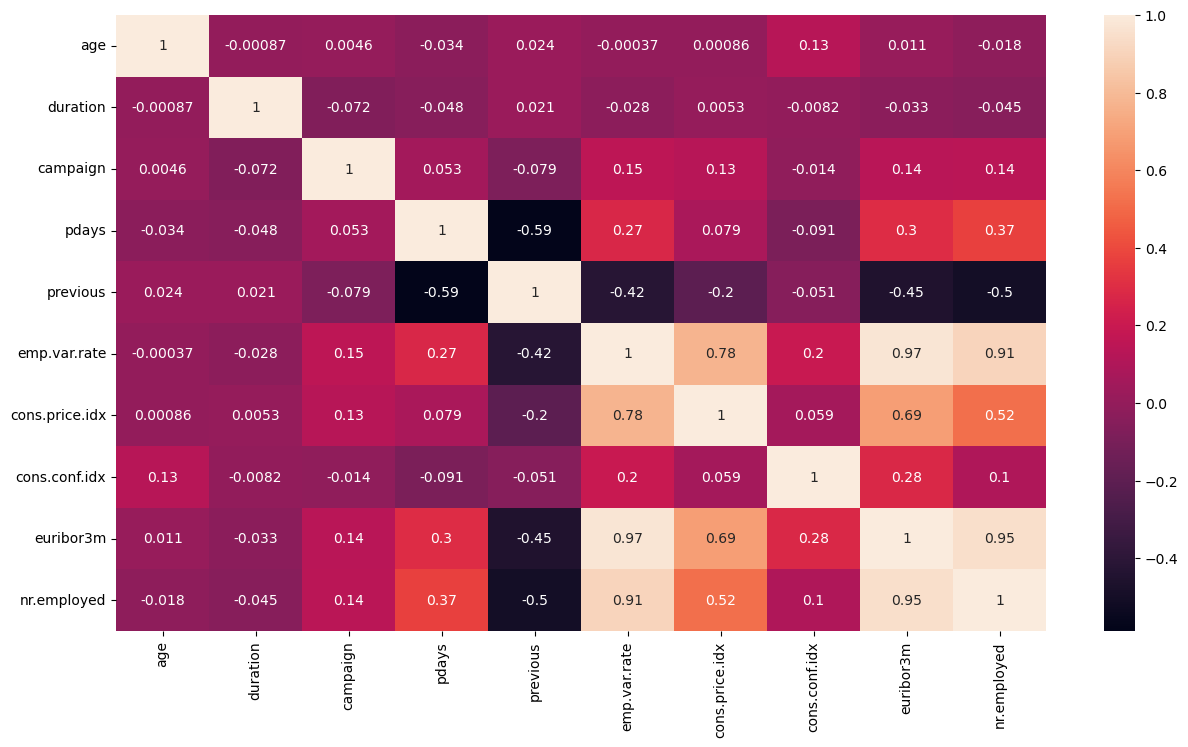

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [14]:
categ_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [15]:
def chi2(var1,var2):
    contigency_table = pd.crosstab(var1,var2)
    _,p,_,_ = chi2_contingency(contigency_table)
    
    if p < 0.05:
        print("accept alternate hypothesis")
    else:
        print("fail to reject null hypothesis")
    return contigency_table    
    

In [22]:
for i in data.columns:
    if data.columns.dtype=='object':
      print(i, "and 'y' ")
      chi2(data[i],data['y'])

age and 'y' 
accept alternate hypothesis
job and 'y' 
accept alternate hypothesis
marital and 'y' 
accept alternate hypothesis
education and 'y' 
accept alternate hypothesis
default and 'y' 
accept alternate hypothesis
housing and 'y' 
fail to reject null hypothesis
loan and 'y' 
fail to reject null hypothesis
contact and 'y' 
accept alternate hypothesis
month and 'y' 
accept alternate hypothesis
day_of_week and 'y' 
accept alternate hypothesis
duration and 'y' 
accept alternate hypothesis
campaign and 'y' 
accept alternate hypothesis
pdays and 'y' 
accept alternate hypothesis
previous and 'y' 
accept alternate hypothesis
poutcome and 'y' 
accept alternate hypothesis
emp.var.rate and 'y' 
accept alternate hypothesis
cons.price.idx and 'y' 
accept alternate hypothesis
cons.conf.idx and 'y' 
accept alternate hypothesis
euribor3m and 'y' 
accept alternate hypothesis
nr.employed and 'y' 
accept alternate hypothesis
y and 'y' 
accept alternate hypothesis


In [24]:
for i in categ_features:
    print(categ_features[i].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178